# Homework assignment 3: Decision trees and ROC curves

** Objective: ** The objective of this exercise is to become familiar with fitting decision trees and
making ROC curves in Python.

** Material: ** Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, Introduction to Data Mining, section 4.1-4.6, as well as the included article on ROC curves.

** Important: ** When handing in your homework:
+ Provide clear and complete answers to the questions below under a seperate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Before you hand in your assignment, make sure all figures include legends, titles, and axis-labels as necessary. 
+ Hand-in: upload to Blackboard.
+ Include name, student number, assignment (especially in filenames)
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: use the BB discussion board or email the student assistants.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute,
http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


## While notebooks are good for handing in homework, the actual programming can best be done in an IDE like Spyder (which comes with Anaconda). This is easier for debugging, variable checking, and checking the python doc of the function you're using. 

#### Student number 1: s4401417
#### Student number 2: s4813081

## 3.1 Decision trees

In this part of the exercise we will fit decision trees using the scikitlearn classifier
`sklearn.tree.DecisionTreeClassifier`. As a splitting criterion, the function uses
one of the following two impurity measures:

\begin{equation} \textrm{gdi}(t) = -\sum_{i=1}^C p(i|t)^2 \quad \text{       equivalent to Gini(t)} \end{equation}   

\begin{equation}
\textrm{deviance}(t) = -2\sum_{i=1}^C p(i|t) \log p(i|t) \quad \text{equivalent to Entropy(t)} 
\end{equation}

We will analyze the wine data we have used previously. The wine data set has the following attributes, all of which are continuous: 


| #             | Attribute     | Unit  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | g/dm$^3$ |
|2 | Volatile acidity (acetic) | g/dm$^3$ |
|3 | Citric acid | g/dm$^3$ |
|4 | Residual sugar | g/dm$^3$ |
|5 | Chlorides | g/dm$^3$ |
|6 | Free sulfur dioxide | mg/dm$^3$ |
|7 | Total sulfur dioxide | mg/dm$^3$ |
|8 | Density | g/cm$^3$ |
|9 | pH | pH |
|10 | Sulphates | g/dm$^3$ |
|11 | Alcohol | % vol. | 


#### 3.1.1
Load the wine data set `Data/wine.mat`. This contains the same data as used in the earlier assignment, but with outliers and the 12th attribute already removed. ** To make sure all data has the correct shape, type, or values that you expect, I strongly recommend making this assignment in the Spyder IDE and checking out the variable explorer. ** 

   ** hints: **   
*The object in wine.mat is a dictionary. The attributes are stored in matrix $X$, the class in vector $y$. $y$ might be shaped as an array containing single element arrays. To flatten $y$, you can use `y.ravel()`. Attribute names and class names are stored in the attributeNames and classNames objects, which contain arrays, of which the first element contains the names. To get the names from those arrays, you can use list comprehension, e.g. 'attributeNames = [i[0] for i in wine_data['attributeNames'][0]]' . For more on list comprehension, check http://www.secnetix.de/olli/Python/list_comprehensions.hawk *



In [33]:
import numpy as np
from scipy.io import loadmat

wine_data = loadmat('Data/wine.mat')

X = wine_data['X']
y = (wine_data['y']).ravel()
attributeNames = [str(i[0]) for i in wine_data['attributeNames'][0]]
classNames = [str(i[0][0]) for i in wine_data['classNames']]

#### 3.1.2
 (2 pts) Fit a decision tree to the wine data in order to estimate if the wine is red or white. Use the Gini (gdi) splitting criterion. Use `min_samples_split=100` for the stopping criterion. Explain what happens when you change the values of the parameter `min_samples_split`. After fitting the tree, visualize it with the tree_print function in `treeprint.py`. 

** hints: **   
*Help documentation for the DecisionTreeClassifier function can be found at * http://scikit-learn.org/stable/modules/tree.html#classification  


#### Answer theoretical questions:




The larger the min_samples_split, the smaller the tree becomes, since a new branch is only created when a large number of wines satisfy a certain condition. This also means that the conditions found in the tree are typically more significant than in a tree with a smaller min_samples_split.

In [48]:
from sklearn import tree
import treeprint
# Fit tree classifier, Gini split criterion
dtc = tree.DecisionTreeClassifier(min_samples_split=100)     #create tree
dtc = dtc.fit(X, y)                                          #fit on data



treeprint.tree_print(dtc, attributeNames, classNames)


         |->3  White
         |
      |->2 then if Sulphates =< 0.555000007153: go to 3, else go to 4
      |  |
      |  |->4  White
      |
   |->1 then if Chlorides =< 0.0464999973774: go to 2, else go to 5
   |  |
   |  |  |->6  White
   |  |  |
   |  |->5 else if Sulphates =< 0.365000009537: go to 6, else go to 7
   |     |
   |     |  |->8  White
   |     |  |
   |     |->7 else if Density =< 0.99082005024: go to 8, else go to 9
   |        |
   |        |     |->11  White
   |        |     |
   |        |  |->10 then if Residual sugar =< 1.10000002384: go to 11, else go to 12
   |        |  |  |
   |        |  |  |  |->13  Red
   |        |  |  |  |
   |        |  |  |->12 else if Density =< 0.992749989033: go to 13, else go to 14
   |        |  |     |
   |        |  |     |  |->15  Red
   |        |  |     |  |
   |        |  |     |->14 else if Chlorides =< 0.0509999990463: go to 15, else go to 16
   |        |  |        |
   |        |  |        |  |->17  Red
   |        |  

#### 3.1.3

(0.5 pts) Show that a wine with the following attribute values would be classified as white by the tree fitted in 3.1.2.

| #             | Attribute     | Value  |
| ------------- |:-------------| -----:|
|1 | Fixed acidity (tartaric) | 6.9 g/dm$^3$ |
|2 | Volatile acidity (acetic) | 1.09 g/dm$^3$ |
|3 | Citric acid | 0.06 g/dm$^3$ |
|4 | Residual sugar | 2.1 g/dm$^3$ |
|5 | Chlorides | 0.0061 g/dm$^3$ |
|6 | Free sulfur dioxide | 12 mg/dm$^3$ |
|7 | Total sulfur dioxide | 31 mg/dm$^3$ |
|8 | Density | 0.99 g/cm$^3$ |
|9 | pH | 3.5 |
|10 | Sulphates | 0.64 g/dm$^3$ |
|11 | Alcohol | 12 % vol. | 

** hints: **
*If you don't know how to classify input values with a tree, see the help documentation for the DecisionTreeClassifier function. *

In [67]:
x = [[6.9, 1.09, 0.06, 2.1, 0.0061, 12, 31, 0.99, 3.5, 0.64, 12]]
x_class = dtc.predict(x)  # 'white'
print("The wine class is: " + str(classNames[x_class[0]]))

The wine class is: White


#### 3.1.4
(1 pts) Classify all the wines in the wine data set. What percentage of the wine data is classified correctly by the tree?

#### Answer theoretical questions:




.

In [82]:
predictedClass = [dtc.predict([i]) for i in X]

accuracy = 0.0
for i in range(0, len(y)):
    accuracy = accuracy + 1 if predictedClass[i] == y[i] else accuracy
accuracy = accuracy/len(y)
print("The accuracy of the tree prediction (with min_samples_split=100) is: " + str(accuracy*100) + "%")

#write your code here

The accuracy of the tree prediction (with min_samples_split=100) is: 98.6833756345%


## 3.2 Decision tree pruning using cross-validation

In this exercise we will use cross-validation to prune a decision tree. When applying cross-validation the observed data is split into training and test sets, i.e., `X_train`, `y_train` and `X_test` and `y_test`. We train the model on the training data and evaluate the performance of the trained model on the test data.

#### 3.2.1
(2 pts) Load the wine data set `Data/wine.mat` using the `loadmat()` function. Divide the data into a training and a test data set. Fit a decision tree to the training data using the Gini (`gdi`) splitting criterion.

Now, we want to find an optimally pruned decision tree, by modifying its maximum depth. For different values of parameter `depth` (from 2 to 20), first fit the decision tree, and then compute the classification error on the training and test set (this is called holdout cross-validation). Plot the training and test classification error as a function of the tree depth in the same figure. This will show us what the optimal pruning depth is for the training set, but also how well this generalizes to a test set. 


** hints: **  
*Take a look at the module `sklearn.model_selection` and see how it can be used to partition the data into a training and a test set (holdout validation, `train_test_split()` function). Note that the package also contains functions to partition data for K-fold cross-validation. Some of the functions can ensure that both training and test sets have roughly the same class proportions.* 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data?

#### Answer theoretical questions:




The optimal tree depth varies greatly between training sets. The optimal tree depth is most frequently around 7

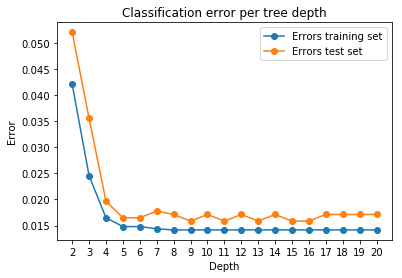

In [176]:
from scipy.io import loadmat
from sklearn import model_selection, tree
import matplotlib.pyplot as plt

# Load Matlab data file and extract variables of interest
wine_data = loadmat('Data/wine.mat')
X = wine_data['X']
y = (wine_data['y']).ravel()

attributeNames = [str(i[0]) for i in wine_data['attributeNames'][0]]
classNames = [str(i[0][0]) for i in wine_data['classNames']]

# Simple holdout-set crossvalidation
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y)

#write your code here
def computeErrors(X_train, X_test, y_train, y_test):
    errors_train = np.zeros(19)
    errors_test = np.zeros(19)
    for j in range(2,21):
        dtc = tree.DecisionTreeClassifier(max_depth = j, min_samples_split=100)
        dtc = dtc.fit(X_train, y_train)

        predictedClass_test = [dtc.predict([i]) for i in X_test]
        predictedClass_train = [dtc.predict([i]) for i in X_train]

        error = 0.0
        for i in range(0, len(y_test)):
            error = error + 1 if predictedClass_test[i] != y_test[i] else error
        errors_test[j-2] = error/len(y_test)

        error = 0.0
        for i in range(0, len(y_train)):
            error = error + 1 if predictedClass_train[i] != y_train[i] else error
        errors_train[j-2] = error/len(y_train)
    return errors_train, errors_test;

# Plots
errors_train, errors_test = computeErrors(X_train, X_test, y_train, y_test)
axis = range(2,21)
plt.plot(axis, errors_train, label='Errors training set', marker='o')
plt.plot(axis, errors_test, label='Errors test set', marker='o')
plt.xticks(np.arange(2,21,1))
plt.title("Classification error per tree depth")
plt.ylabel("Error")
plt.xlabel("Depth")
plt.legend()
plt.show()



#### 3.2.2
(1.5 pts) Repeat the exercise above, using 10-fold cross-validation. K-fold cross-validation works by splitting X into K partitions of equal length. Then in each fold, you choose K-1 partitions as the training set and the remaining partition as the test set. Every partition gets a turn being a test set. For a very nice simple explanation of how (and why) K-fold works, check out http://www.dummies.com/programming/big-data/data-science/resorting-cross-validation-machine-learning/


For each fold, fit a decision tree on the training set and evaluate its performance on the test set. Finally, compute the average classification errors on the test- and training sets across the 10 cross-validation folds and plot them as a function of the tree depth.

** hints: **
*This time the `KFold()` function from the module `sklearn.model_selection` can be used to partition the data into the 10 training and test partitions. Check out http://scikit-learn.org/stable/modules/cross_validation.html#k-fold for an example of how to acces the indices for the training set and the test set in each fold. Those indices can then be used to create the training and test set, e.g. `X_train = X[train_indices]`*
 

What appears to be the optimal tree depth? Do you get the same result when you run your code again, generating a new random split between training and test data? How about 100-fold cross-validation?

#### Answer theoretical questions:




If unshuffled, the optimal tree depth is 4. If shuffled, the optimal tree depth is roughly 6 or 7 again. <br>
For K = 100, we got an optimal tree depth of 15. Furthermore, the classification error on the test set is significantly lower than when K = 10. The K = 100 computation took several minutes to compute, we are **not** doing that again to compare it between different runs >.<


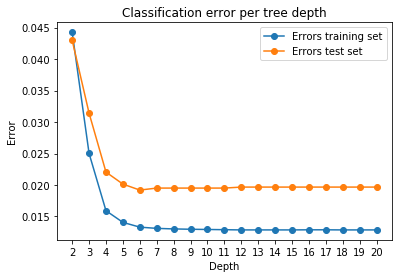

In [182]:
from sklearn.model_selection import KFold
K = 10
kF = KFold(n_splits=K, shuffle=True)
meanErrors_train = np.zeros(19)
meanErrors_test = np.zeros(19)
for train_indices, test_indices in kF.split(X):
    X_train = [X[i] for i in train_indices]
    y_train = [y[i] for i in train_indices]
    X_test = [X[i] for i in test_indices]
    y_test = [y[i] for i in test_indices]
    errors_train, errors_test = computeErrors(X_train, X_test, y_train, y_test)
    for i in range(0,19):
        meanErrors_train[i] += errors_train[i]
        meanErrors_test[i] += errors_test[i]
meanErrors_train = meanErrors_train/K
meanErrors_test = meanErrors_test/K

axis = range(2,21)
plt.plot(axis, meanErrors_train, label='Errors training set', marker='o')
plt.plot(axis, meanErrors_test, label='Errors test set', marker='o')
plt.xticks(np.arange(2,21,1))
plt.title("Classification error per tree depth")
plt.ylabel("Error")
plt.xlabel("Depth")
plt.legend()
plt.show()

 ## 3.3 ROC curves, AUC scores, and the sign test

In this exercise we will use ROC curves and the sign test to compare classifiers. Study the lecture slides and the paper 'ROC Graphs: Notes and Practical Considerations for Researchers' by Tom Fawcett included with the homework assignment (ROC101.pdf). It describes all you need to know (and much, much more..) about ROC curves. The method explained for computing the area under the curve is unnecessarily complicated. A simpler formula is:
$$
    \mbox{AUC} = {1 \over m n} \sum_{i=1}^m \sum_{j=1}^n \mathbf{\large 1}_{p_i > p_j} \: .
   $$
Here $i$ runs over all $m$ data points with true label 1, and $j$ runs over all $n$ data points with true label $0$; $p_i$ and $p_j$ denote the probability score assigned by the classifier to data point $i$ and $j$, respectively. $\mathbf{\large 1}$ is the indicator function: it outputs $1$ if the condition (here $p_i > p_j$) is satisfied and $0$ otherwise. *Simply put: this formula computes how often the probability of a data point with true label 1 is higher than the probability of data points with true label 0. This is then divided by the total number of comparisons between probabilities.*
    
To make sure you understand how ROC works, you can make an ROC curve and calculate the AUC (on paper) with the following data:

`
labels = [0,0,0,1,0,1,1,0,1,1]
classifier_probs = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99]
`
    


#### 3.3.1
  Load the file `Data/classprobs.xls`. The first column gives the true class label (either 0 or 1). The second and third column give the probabilistic scores for two different classifiers. The higher this probability, the more certain the classifier is that the example belongs to class 1 (instead of class 0).

** hints: **
*To get a column (in list form) from a file opened with xlrd, you can use the `col_values()` function on that file, e.g. `col0 = doc.col_values(0)`.*


In [5]:
import numpy as np
import xlrd

doc = xlrd.open_workbook('Data/classprobs.xls').sheet_by_index(0)
true_class = doc.col_values(0)
pred1 = doc.col_values(1)
pred2 = doc.col_values(2)

#### 3.3.2 
(1 pts) Calculate the ROC curves for the classifiers and plot them. Also plot a dashed line on the diagonal to represent random guessing in the same figure. Interpret the obtained results. Do both classifiers perform better than random guessing?

** hints: **  
*The function `sklearn.metrics.roc_curve` can be used for computing the ROC. *
 

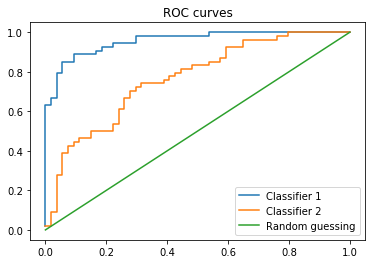

In [20]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


FP1, TP1, thresh1 = roc_curve(true_class, pred1)
FP2, TP2, thresh2 = roc_curve(true_class, pred2)

#write your code here
plt.plot(FP1, TP1, label='Classifier 1')
plt.plot(FP2, TP2, label='Classifier 2')
plt.plot(FP1, FP1, label='Random guessing')
plt.legend()
plt.title('ROC curves')
plt.show()

#### 3.3.3
(1 pts) Compute the AUC scores (area under the curve) of both classifiers using the formula given above. Do the AUC scores indicate that the classifiers are performing better than this baseline?




 

In [32]:
indices_true = []
indices_false = []
for i in range(0, len(true_class)):
    if true_class[i] == 1: 
        indices_true.append(i)
    else:
        indices_false.append(i)

AUC1 = 0.0
AUC2 = 0.0

for i in indices_true:
    for j in indices_false:
        if pred1[i] > pred1[j]:
            AUC1 += 1
        if pred2[i] > pred2[j]:
            AUC2 += 1

AUC1 = 1.0/(len(indices_true)*len(indices_false))*AUC1
AUC2 = 1.0/(len(indices_true)*len(indices_false))*AUC2

print("AUC for classifier 1: " + str(AUC1))
print("AUC for classifier 2: " + str(AUC2))

AUC for classifier 1: 0.956447187929
AUC for classifier 2: 0.765432098765


Both AUC scores are greater than 0.5, so both classifiers perform better than random guessing on average. A greater AUC score does not mean that a classifier performs better than random guessing for every false positive value however.


#### 3.3.4 
(0.5 pts) Using a threshold of 0.5, translate the probability scores to predicted class labels, and compute the accuracy for each of the classifiers.

In [43]:
threshold = 0.5
classes1 = [int(round(x)) for x in pred1]
classes2 = [int(round(x)) for x in pred2]

true1 = 0.0
true2 = 0.0

for i in range(0, len(true_class)):
    if classes1[i] == true_class[i] : true1 += 1.0
    if classes2[i] == true_class[i] : true2 += 1.0

print("Accuracy classifier 1: " + str(true1/len(true_class)))
print("Accuracy classifier 2: " + str(true2/len(true_class)))

Accuracy classifier 1: 0.861111111111
Accuracy classifier 2: 0.694444444444


#### 3.3.5
(0.5 pts) Create the 2x2 table of wrong and correct classifications by the first and the second classifier, like in the lecture slides (lecture on model evaluation, part on the sign test). Perform a sign test to test whether the performance of the two classifiers is significantly different at a significance level of 0.05. **If you are not familiar with sign testing, you can read the example provided below.**


** hints: **  
*As explained in the lecture slides, the sign test is a binomial test on the lower-left ($N_{1<2}$) and upper-right ($N_{1>2}$) elements of the cross table. Unlike in the lecture slides, here you need to perform a two-sided test: $$\textrm{p-value} = P(W \leq \min(N_{1<2},N_{1>2}) \textrm{ or } W \geq  \max(N_{1<2},N_{1>2})$$
The function `scipy.stats.binom.cdf` can be used to compute the cumulative density of the binomial distribution.
For more information on the sign test, see the included paper by Salzberg (signtest.pdf, in particular section 3.1).*

In [76]:
import pandas
from IPython.display import display
from scipy.stats import binom

matrix = [[0, 0], [0, 0]]

for i in range(0, len(true_class)):
    if classes1[i] == true_class[i]:
        if classes2[i] == true_class[i]:
            matrix[0][0] += 1
        else: matrix[0][1] += 1
    else:
        if classes2[i] == true_class[i]:
            matrix[1][0] += 1
        else: matrix[1][1] += 1 

display(pandas.DataFrame(matrix, ["Correct Class. 1", "Incorrect Class. 1"], ["Correct Class. 2", "Incorrect Class. 2"]))

p = 1 + binom.cdf(min(matrix1[1][0],matrix[0][1]), matrix[1][0]+matrix[0][1], 0.5) - binom.cdf(max(matrix1[1][0],matrix[0][1])-1, matrix[1][0]+matrix[0][1], 0.5)
print("The p-value is: " + str(p))

,Correct Class. 2,Incorrect Class. 2
Correct Class. 1,67,26
Incorrect Class. 1,8,7


The p-value is: 0.00598812056705


This p-value is smaller than 0.05, so there is a significant difference in the performance of the classifiers.

## Example two-sided sign test

Imagine you have a lucky coin, that you are certain does not result in heads 50% of the times you flip it. However, you friend (lets call him *zero-hypothesis*) claims that your coin is just like his random coin. To verify whether this is true, you decide to compare the performance (you are a scientist after all) of your lucky coin resulting in heads to the performance of the random coin resulting in heads with a sign test. How do you do this?

First, you collect data. Assume you both used your coin during 23 bets. During those 23 bets, you both flip your respective coins. It was determined that if one of you flipped head while the other didn't, that person won the bet, and the other person lost. If you both got the same outcome, neither of you won. 1 stands for head, and 0 for tails. These were your results:

In [1]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

#results
lucky_coin = np.array([1,1,1,0,1,1,1,1,1,0,1,1,1,1,0,1,1,0,1,1,1,0,1])
random_coin= np.array([0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0,0])


Now you calculate how often in any pair of outcomes one coin *won*, i.e. one coin flipped to head while the other flipped to tails.

In [2]:
N_l = sum((lucky_coin == 1) & (random_coin == 0)) #how often your lucky coin won
N_r = sum((lucky_coin == 0) & (random_coin == 1)) #how often the random coin won
N = N_l + N_r #how often one coin was a winner
print('The lucky coin won {} times, while the random won {} times.'.format(N_l,N_r))

The lucky coin won 12 times, while the random won 3 times.


You observed 15 times that one coin won. If both coins resulted in heads 50% of the time, like *zero-hypothesis* stated, you'd expect that both coins have 50% chance of being the winner. So the probability distributions for both N_l and N_r should look something like this:

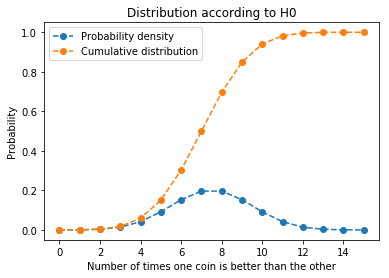

In [3]:
b = binom(N,0.5) #N=observations of inequality, p=prob of one coin being better
plt.plot(b.pmf(range(N+1)), '--o',label = 'Probability density')
plt.plot(b.cdf(range(N+1)), '--o',label = 'Cumulative distribution')
plt.legend()
plt.xlabel('Number of times one coin is better than the other')
plt.ylabel('Probability')
plt.title('Distribution according to H0')
plt.show()

(Of course this is a discrete probability function, so you're not interested in values between integers.)

As you can see, according to *zero-hypothesis*, 7 and 8 are the most likely values for both N_l and N_r. But this is not what you observed in your data. To conclude that *H0* is false, you need to show that your outcome is unlikely under the assumption that *H0* is true: the values you observed are so extreme that these values or more extreme values occur less than 5% of the time (*p-value < 0.05*). So how unlikely is it that one coin is better 12 times or more, and the other is better 3 times or less?

It's the sum of the values of the probability density function (pdf or pmf in the python doc) at  0,1,2 and 3, plus the sum of the values of the pdf at 12,13,14 and 15. 

This is equal to the value of the cumulative distribution function (cdf) at 3, plus 1 minus the value of cdf at 11 (since `1-cdf(11)` represents the probability of observing 12 or bigger).

In [4]:
p_value = b.cdf(min(N_r,N_l)) + (1-b.cdf(max(N_r,N_l)-1))
print('The p-value is {:.3f}'.format(p_value))

The p-value is 0.035


So your observations are unlikely if *zero-hypothesis* is right. By statistical theory, you can now say that you have significant reason to reject their opinion. Now the hardest part of statistics: convincing your non-scientist friends.